In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv("/content/drive/MyDrive/MSC DSAI/sem-2/Unsupervised  Learning/pract-1/first_500_rows.csv")
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 2.3+ MB


In [41]:
df.shape

(500, 592)

In [42]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,497.000000,498.000000,499.000000,499.000000,499.000000,499.0,499.000000,499.000000,500.000000,500.000000,...,229.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,500.000000
mean,3005.278732,2494.609378,2203.829387,1339.713650,1.275486,100.0,102.281091,0.121936,1.480295,-0.001594,...,104.320484,0.500452,0.015916,0.004018,3.187851,0.019012,0.016934,0.005456,112.076847,-0.764000
std,65.569063,90.397472,25.802867,288.301201,0.295656,0.0,3.206394,0.001825,0.066505,0.015433,...,88.923540,0.003610,0.021333,0.004623,4.439026,0.010779,0.008875,0.002719,94.072452,0.645862
min,2787.490000,2162.870000,2113.077800,877.626600,0.681500,100.0,93.984400,0.117100,1.191000,-0.041000,...,0.000000,0.480000,0.007300,0.002100,1.460400,-0.004200,0.004200,0.001500,0.000000,-1.000000
25%,2959.650000,2453.487500,2184.005500,1064.844600,1.008100,100.0,99.875550,0.120600,1.439950,-0.011325,...,48.907200,0.498200,0.011600,0.003100,2.306500,0.011700,0.010800,0.003600,50.310150,-1.000000
50%,3007.380000,2495.740000,2199.333400,1330.671800,1.310100,100.0,102.097800,0.121800,1.479400,-0.001150,...,80.724000,0.500500,0.013900,0.003700,2.784500,0.018800,0.014900,0.004700,82.098900,-1.000000
75%,3050.290000,2539.437500,2220.711100,1588.509000,1.511900,100.0,104.172200,0.122600,1.531300,0.008000,...,122.413500,0.502950,0.016700,0.004200,3.327650,0.026800,0.020400,0.006650,144.480600,-1.000000
max,3266.040000,2810.120000,2304.211100,2028.220800,1.884800,100.0,111.890000,0.127600,1.648600,0.044200,...,706.824000,0.509800,0.476600,0.104500,99.303200,0.058400,0.060700,0.018800,706.824000,1.000000


In [43]:
df.isnull().sum()

,0
Time,0
0,3
1,2
2,1
3,1
...,...
586,1
587,1
588,1
589,1


In [44]:
X = df.drop(columns = ['Time', 'Pass/Fail'])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [45]:
y = df['Pass/Fail']
y.head()

,Pass/Fail
0,-1
1,-1
2,1
3,-1
4,-1


# Feature Selection

In [46]:
selector = VarianceThreshold()
X_selected = selector.fit_transform(X)
print(X_selected)

[[3.0309300e+03 2.5640000e+03 2.1877333e+03 ...           nan
            nan           nan]
 [3.0957800e+03 2.4651400e+03 2.2304222e+03 ... 2.0100000e-02
  6.0000000e-03 2.0820450e+02]
 [2.9326100e+03 2.5599400e+03 2.1864111e+03 ... 4.8400000e-02
  1.4800000e-02 8.2860200e+01]
 ...
 [3.0575600e+03 2.4710100e+03 2.1807000e+03 ... 2.6000000e-02
  7.1000000e-03 1.0216520e+02]
 [2.9544100e+03 2.6149900e+03 2.2082334e+03 ... 2.2600000e-02
  7.9000000e-03 4.7408120e+02]
 [2.9972700e+03 2.6198800e+03 2.1486223e+03 ... 2.2600000e-02
  7.9000000e-03 4.7408120e+02]]


In [47]:
len(X_selected)

500

In [48]:
imputer = SimpleImputer(strategy = 'mean')
X_imputed = imputer.fit_transform(X_selected)
print(X_imputed)

[[3.03093000e+03 2.56400000e+03 2.18773330e+03 ... 1.69340681e-02
  5.45551102e-03 1.12076847e+02]
 [3.09578000e+03 2.46514000e+03 2.23042220e+03 ... 2.01000000e-02
  6.00000000e-03 2.08204500e+02]
 [2.93261000e+03 2.55994000e+03 2.18641110e+03 ... 4.84000000e-02
  1.48000000e-02 8.28602000e+01]
 ...
 [3.05756000e+03 2.47101000e+03 2.18070000e+03 ... 2.60000000e-02
  7.10000000e-03 1.02165200e+02]
 [2.95441000e+03 2.61499000e+03 2.20823340e+03 ... 2.26000000e-02
  7.90000000e-03 4.74081200e+02]
 [2.99727000e+03 2.61988000e+03 2.14862230e+03 ... 2.26000000e-02
  7.90000000e-03 4.74081200e+02]]


(-1.0, 1.0)

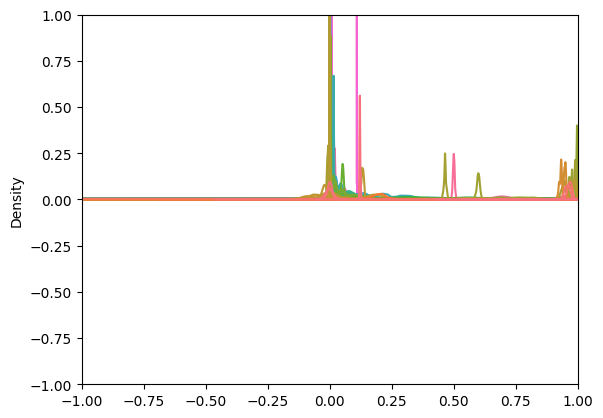

In [49]:
sb.kdeplot(X_imputed,legend = False)
plt.xlim(-1, 1)
plt.ylim(-1, 1)


(-1.0, 1.0)

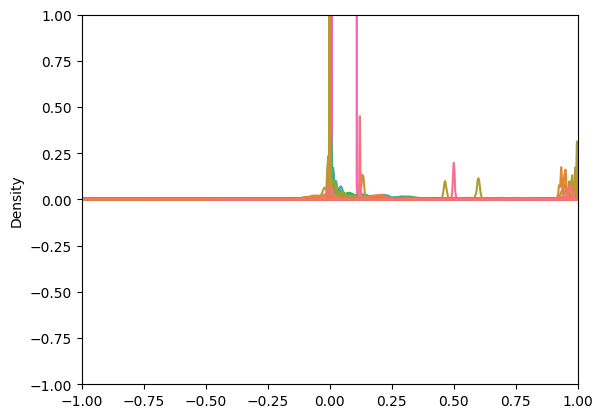

In [50]:
sb.kdeplot(X,legend = False)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [51]:
kb = SelectKBest(score_func = f_classif, k = 20)
kb_select = kb.fit_transform(X_imputed, y)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size = 0.2, random_state = 42)

# Feature Extraction

In [53]:
pca = PCA(n_components = 10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [54]:
clf_before = RandomForestClassifier(n_estimators = 100, random_state = 42)
clf_before.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred_before = clf_before.predict(X_test)
acc = accuracy_score(y_test, y_pred_before)
print(f'Accuracy before dimensionality reduction:{acc}')

Accuracy before dimensionality reduction:0.86


In [56]:
clf_after = RandomForestClassifier(n_estimators = 100, random_state = 42)
clf_after.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred_after = clf_after.predict(X_test_pca)
acc1 = accuracy_score(y_test, y_pred_after)
print(f'Accuracy after dimensionality reduction:{acc1}')

Accuracy after dimensionality reduction:0.86


In [59]:
clf_before = LogisticRegression()
clf_before.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred_before = clf_before.predict(X_test)
acc = accuracy_score(y_test, y_pred_before)
print(f'Accuracy before dimensionality reduction:{acc}')

Accuracy before dimensionality reduction:0.85


In [61]:
clf_after = LogisticRegression()
clf_after.fit(X_train_pca, y_train)

LogisticRegression()

In [62]:
y_pred_after = clf_after.predict(X_test_pca)
acc1 = accuracy_score(y_test, y_pred_after)
print(f'Accuracy after dimensionality reduction:{acc1}')

Accuracy after dimensionality reduction:0.86


In [58]:
print(pca.explained_variance_ratio_)
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)}")

[0.51838776 0.29496934 0.06091871 0.05093539 0.02353126 0.01715892
 0.00553501 0.00466569 0.00315293 0.00246198]
Total explained variance: 0.9817169765299134


*   PCA retains most of the important information in the dataset by focusing on components with the highest variance.
*   If the first 10 principal components (as per n_components=10) capture nearly all the variance of the original dataset, the information loss due to dimensionality reduction will be negligible.
*  The classifier will then have access to nearly the same "quality" of data, resulting in little or no change in accuracy.




